<a href="https://colab.research.google.com/github/lilyzhizhou/datathon-3/blob/main/Prediabetes_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import plotly.express as px
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Diabetes Data - add your file path in a separate line

# Lily
data_raw = pd.read_excel('/content/drive/MyDrive/Machine Learning /Datathon #3/Diabetes Study File 10K Dec 14 2017.xlsx')

# Kat

#Paijani
#data_raw = pd.read_excel('/content/drive/MyDrive/Datathon #3/Diabetes Study File 10K Dec 14 2017.xlsx')

In [4]:
data_raw = data_raw.sort_values('Patient_ID')

print(data_raw.shape)
data_raw.head()

(10000, 43)


,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
7754,75,170.0,2012-10-23,32.500000,2012-06-14,3.98,2012-11-07,1.66,2012-11-07,6.6,2012-11-07,2.33,2012-11-07,7.2,2012-11-07,1,5.96,2012-03-23,1,2005-03-22,1,2008-10-03,1,2007-07-31,1,2011-08-09,0,NaT,DILTIAZEM / FELODIPINE / HYDROCHLOROTHIAZIDE ...,2005-03-22,PREDNISONE,2005-11-01,Female,39121.0,38433.0,39121.0,38433.0,False,False,1001000000001950,2005-03-15,2004-03-15,Yes
7773,49,130.0,2007-04-17,33.400000,2007-04-17,3.24,2007-05-03,1.88,2007-05-03,6.6,2007-05-03,1.16,2007-05-03,7.5,2007-05-03,0,5.65,2007-05-03,1,2007-05-03,0,NaT,1,2010-06-16,0,NaT,0,NaT,RAMIPRIL,2007-06-19,NaN,NaT,Female,39636.0,39205.0,38491.0,38491.0,False,True,1001000000003945,2005-05-12,2004-05-12,Yes
2386,66,112.0,2010-05-13,23.600000,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000004538,NaT,NaT,No
7734,84,128.0,2011-01-24,30.677753,2011-10-24,2.13,2011-02-15,1.81,2011-02-15,7.6,2011-02-15,NaN,NaT,5.3,2011-02-15,1,4.76,2011-02-15,1,2010-06-03,0,NaT,1,2010-02-04,1,2004-09-30,0,NaT,TELMISARTAN / AMLODIPINE,2009-04-27,"HYDROCORTISONE, COMBINATIONS / PREDNISONE",2010-03-18,Female,40862.0,40332.0,39937.0,39937.0,False,True,1001000000005143,2009-04-27,2008-04-27,Yes


Filter to only pre-diabetic and non-diabetic observations

---





In [5]:
datapd = data_raw[data_raw['FBS'] <= 6.9] # filter by pre-diabetic threshold for FBS
datapd = datapd[datapd['A1c'] <= 6.4] # filter by pre-diabetic threshold for A1c

print(datapd.shape)
datapd.head()

(6414, 43)


,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
2,63,133.0,2012-07-31,30.9,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
2386,66,112.0,2010-05-13,23.6,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000004538,NaT,NaT,No
7781,68,122.0,2014-04-23,34.3,2014-03-05,3.09,2014-03-18,1.81,2014-03-18,5.9,2014-03-18,1.44,2014-03-18,5.5,2014-03-18,1,5.55,2014-03-18,1,2009-09-03,1,2010-11-08,1,2009-09-03,1,2014-06-19,0,NaT,CANDESARTAN / HYDROCHLOROTHIAZIDE,2009-09-03,NaN,NaT,Female,40415.0,40059.0,39869.0,39869.0,False,True,1001000000007331,2009-02-18,2008-02-18,Yes
7644,73,118.0,2008-10-02,28.5,2008-11-13,1.04,2008-11-12,0.94,2008-11-12,5.7,2008-11-12,1.35,2008-11-12,6.1,2008-08-20,1,3.78,2009-09-01,1,2006-01-19,1,2014-03-11,1,2009-05-28,0,NaT,1,2005-11-03,CANDESARTAN,2005-07-14,PREDNISONE,2005-10-26,Female,40057.0,38736.0,40057.0,38736.0,False,False,1001000000007333,2006-01-12,2005-01-12,Yes
2290,53,109.0,2014-04-30,33.4,2014-04-30,2.96,2014-05-17,1.53,2014-05-17,5.8,2014-05-17,1.97,2014-05-17,5.9,2014-05-17,1,5.38,2014-05-17,0,NaT,0,NaT,1,2010-12-01,1,2008-07-04,0,NaT,ATENOLOL,2010-12-01,HYDROCORTISONE AND ANTIINFECTIVES,2007-03-09,Female,NaN,NaN,NaN,NaN,NaN,NaN,1001000000009032,NaT,NaT,No


we have 6414 observations after filtering

Creating new variables

---



In [6]:
# Creating new binary variables for medication variables
datapd['corstrd_bin'] = datapd['Corticosteroids'].notna().astype(int)
datapd['htnmed_bin'] = datapd['Hypertension_Medications'].notna().astype(int)

# Creating new binary pre-diabetes variable
condition = ((datapd['FBS'] >= 6.1) & (datapd['FBS'] <= 6.9)) | ((datapd['A1c'] >= 6.0) & (datapd['A1c'] <= 6.4))

# Create the 'predm' variable based on the conditions
datapd['predm'] = condition.astype(int)

datapd.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,A1c_Date,TG,TG_Date,FBS,FBS_Date,FBS>DM,Total_Cholesterol,Total_Cholesterol_Lab_Date,Diabetes,DM_OnsetDate,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date,Hypertension_Medications,Hypertension_Medications_First_Instance,Corticosteroids,Corticosteroids_first_instance,Sex,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES,corstrd_bin,htnmed_bin,predm
2,63,133.0,2012-07-31,30.9,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,2012-06-01,0.76,2012-06-01,5.6,2012-06-01,1,NaN,NaT,0,NaT,0,NaT,1,2014-05-21,0,NaT,1,2005-04-08,METOPROLOL / RAMIPRIL / LOSARTAN,2005-01-11,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No,0,1,1
2386,66,112.0,2010-05-13,23.6,2010-03-31,1.62,2011-03-11,1.34,2010-04-01,5.8,2010-04-01,1.53,2010-04-01,6.2,2010-04-01,1,3.54,2010-04-01,0,NaT,1,2004-05-03,1,2007-10-04,1,2010-09-02,0,NaT,RAMIPRIL,2005-06-21,NaN,NaT,Male,NaN,NaN,NaN,NaN,NaN,NaN,1001000000004538,NaT,NaT,No,0,1,1
7781,68,122.0,2014-04-23,34.3,2014-03-05,3.09,2014-03-18,1.81,2014-03-18,5.9,2014-03-18,1.44,2014-03-18,5.5,2014-03-18,1,5.55,2014-03-18,1,2009-09-03,1,2010-11-08,1,2009-09-03,1,2014-06-19,0,NaT,CANDESARTAN / HYDROCHLOROTHIAZIDE,2009-09-03,NaN,NaT,Female,40415.0,40059.0,39869.0,39869.0,False,True,1001000000007331,2009-02-18,2008-02-18,Yes,0,1,0
7644,73,118.0,2008-10-02,28.5,2008-11-13,1.04,2008-11-12,0.94,2008-11-12,5.7,2008-11-12,1.35,2008-11-12,6.1,2008-08-20,1,3.78,2009-09-01,1,2006-01-19,1,2014-03-11,1,2009-05-28,0,NaT,1,2005-11-03,CANDESARTAN,2005-07-14,PREDNISONE,2005-10-26,Female,40057.0,38736.0,40057.0,38736.0,False,False,1001000000007333,2006-01-12,2005-01-12,Yes,1,1,1
2290,53,109.0,2014-04-30,33.4,2014-04-30,2.96,2014-05-17,1.53,2014-05-17,5.8,2014-05-17,1.97,2014-05-17,5.9,2014-05-17,1,5.38,2014-05-17,0,NaT,0,NaT,1,2010-12-01,1,2008-07-04,0,NaT,ATENOLOL,2010-12-01,HYDROCORTISONE AND ANTIINFECTIVES,2007-03-09,Female,NaN,NaN,NaN,NaN,NaN,NaN,1001000000009032,NaT,NaT,No,1,1,0


Selecting variables to include

---



In [7]:
# Remove least0 variables from dataset
deletelist = [col for col in data_raw.columns if col.startswith('least') or col == 'LeastOfAll']
datapd = datapd.drop(deletelist, axis=1)

# Keeping only variables that are relevant to our study
datapd = datapd[["predm","Age_at_Exam","BMI","Total_Cholesterol","Depression","HTN","OA","COPD","corstrd_bin","htnmed_bin","Sex","Patient_ID"]]

datapd.head()


,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex,Patient_ID
2,1,63,30.9,NaN,0,1,0,1,0,1,Male,1001000000000054
2386,1,66,23.6,3.54,1,1,1,0,0,1,Male,1001000000004538
7781,0,68,34.3,5.55,1,1,1,0,0,1,Female,1001000000007331
7644,1,73,28.5,3.78,1,1,0,1,1,1,Female,1001000000007333
2290,0,53,33.4,5.38,0,1,1,0,1,1,Female,1001000000009032


In [8]:
# Export dataset to shared drive
datapd.to_csv('datapd.csv')
!cp datapd.csv "/content/drive/MyDrive/Machine Learning /Datathon #3"

Data Exploration

---



In [9]:
# Convert numeric categorical variables into descriptive categories
datapd_dscrpt = datapd.copy()

datapd_dscrpt['predm'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['Depression'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['HTN'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['OA'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['COPD'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['corstrd_bin'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)
datapd_dscrpt['htnmed_bin'].replace({0 : 'No', 1 : 'Yes'}, inplace=True)

datapd_dscrpt.head()

,predm,Age_at_Exam,BMI,Total_Cholesterol,Depression,HTN,OA,COPD,corstrd_bin,htnmed_bin,Sex,Patient_ID
2,Yes,63,30.9,NaN,No,Yes,No,Yes,No,Yes,Male,1001000000000054
2386,Yes,66,23.6,3.54,Yes,Yes,Yes,No,No,Yes,Male,1001000000004538
7781,No,68,34.3,5.55,Yes,Yes,Yes,No,No,Yes,Female,1001000000007331
7644,Yes,73,28.5,3.78,Yes,Yes,No,Yes,Yes,Yes,Female,1001000000007333
2290,No,53,33.4,5.38,No,Yes,Yes,No,Yes,Yes,Female,1001000000009032


In [10]:
# create list of numerical, categorical, multinomial features
target_column = 'predm'
categorical_columns = ['Depression', 'HTN',
                       'OA', 'COPD', 'Sex',
                       'corstrd_bin','htnmed_bin']
#multinomial_columns = [] there are none
numerical_columns = ['Age_at_Exam','BMI','Total_Cholesterol']

In [11]:
# Checking for any NA values
print(datapd.shape)
print(datapd.isna().sum())

(6414, 12)
predm                  0
Age_at_Exam            0
BMI                    0
Total_Cholesterol    151
Depression             0
HTN                    0
OA                     0
COPD                   0
corstrd_bin            0
htnmed_bin             0
Sex                    0
Patient_ID             0
dtype: int64


- Only Total_Cholesterol is missing observations

In [12]:
# Calculate the percentage of rows with one or more missing values
percentage_missing_rows = (datapd[numerical_columns + categorical_columns + [target_column]].isnull().sum(axis=1) > 0).sum() / len(datapd)
percentage_missing_rows

0.02354225132522607

if we were to remove all missing observations, we would lose 2% of our data


In [15]:
# Check frequency of patient IDs
id_counts = datapd['Patient_ID'].value_counts()
print(id_counts.value_counts())

id_counts_pd = datapd[datapd['predm'] == 1]['Patient_ID'].value_counts()
print("Pre-Diabetes Subset")
print(id_counts_pd.value_counts())

1    5314
2     415
3      67
4      14
7       1
6       1
Name: Patient_ID, dtype: int64
Pre-Diabetes Subset
1    2130
2     187
3      27
4       6
7       1
Name: Patient_ID, dtype: int64


- around 17% of our data contains people who have visited more than once
- evenly distributed between non-diabetic and pre-diabetic groups (56% v 44%)
- will need to address independence problem




In [ ]:
# Checking for Pre-Diabetes imbalance

# Compute the count of each class in the 'target' column
counts = datapd_dscrpt['predm'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of predm',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='target'
    ),
    title=dict(
        text='Distribution of Classes in predm',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

- Good balance of pre-diabetic and non-diabetic

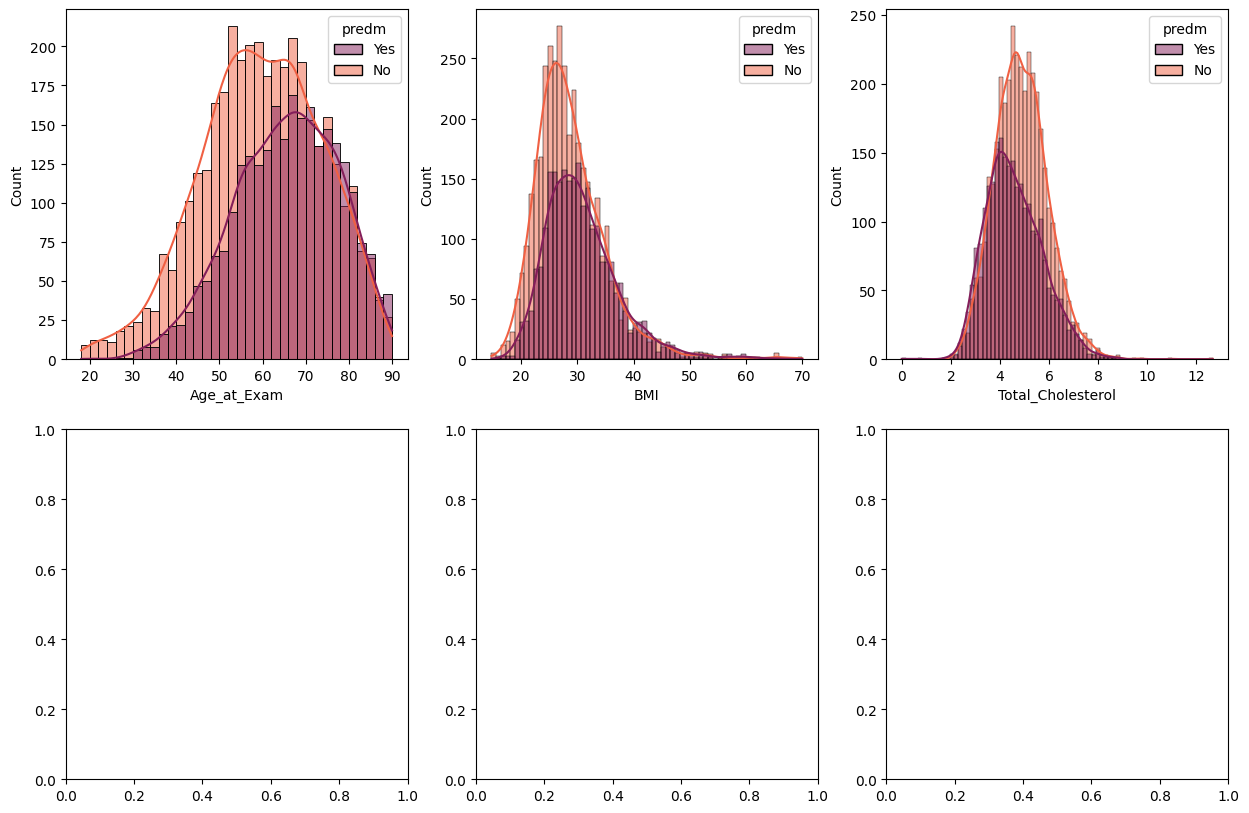

In [ ]:
# checking the difference in distribution of numerical features in two classes

# Create a grid of subplots with 1 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(datapd_dscrpt, x=column, hue= target_column, kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()

- older age for those who are prediabetic
- higher bmi for those who are prediabetic
- lower total cholesterol for those who are prediabetic

<Axes: >

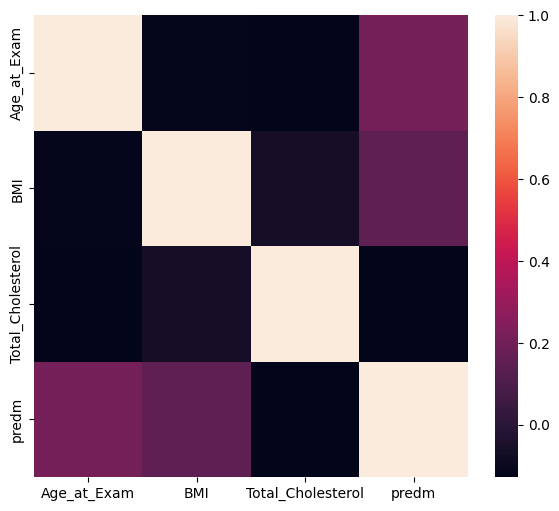

In [ ]:
# correlation matrix

plt.figure(figsize=(7,6))
sns.heatmap(datapd[numerical_columns + [target_column]].corr())